## 1. Introduction

#### **Customer Churn in TELCOs**

Companies usually have a greater focus on customer acquisition and keep retention as a secondary priority. However, it can cost five times more to attract a new customer than it does to retain an existing one. Increasing customer retention rates by 5% can increase profits by 25% to 95%, according to research done by Bain & Company.

_Churn_ is a metric that shows customers who stop doing business with a company or a particular service, also known as customer attrition. By following this metric, what most businesses could do was try to understand the reason behind churn numbers and tackle those factors, with reactive action plans


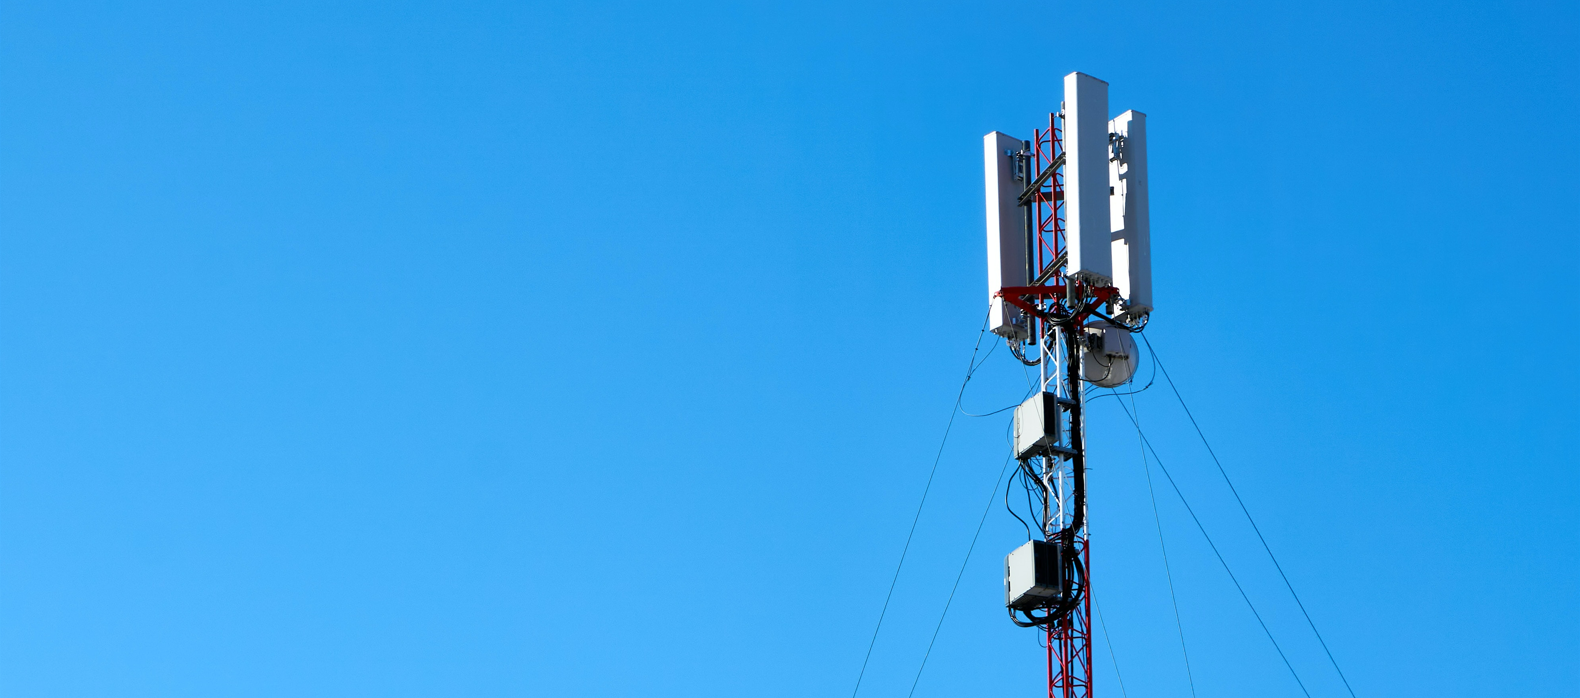

The main goal is to develop a machine learning model capable to predict customer churn based on the customer’s data available.

<p>I'll using the A sample <a href="https://www.kaggle.com/blastchar/telco-customer-churn">Teleco Churn</a> dataset from Kaggle. The structure of this notebook is as follows:</p>
<ul>
<li>First, loading and viewing the dataset.</li>
<li>The dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>Preprocessing of the dataset to ensure the machine learning model we choose can make good classifications.</li>
<li>After our data is in good shape, exploratory data analysis to build our intuitions.</li>
<li>Finally, building a machine learning model that can predict if an individual would churn the service.</li>
</ul>


- `Author - Chinmay Gaikwad`
- `Email - chinnmaygaikwad123@gmail.com`

## 2. Exploratory Data Analysis

### 2.1 Data Load

In [121]:
# Importing pandas
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv',header=0)

In [122]:
# Inspecting data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2 Data Summary

In [123]:
# Inspecting basic information out of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [124]:
# Displaying summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [125]:
# Creating a list of Object data type columns
obj_cols = df.select_dtypes(np.object).columns.tolist()
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(obj_cols)

-----------------------------
4692-NNQRU    0.01
4194-FJARJ    0.01
4254-QPEDE    0.01
4307-KTUMW    0.01
5716-LIBJC    0.01
              ... 
4250-FDVOU    0.01
4660-IRIBM    0.01
7180-PISOG    0.01
9971-ZWPBF    0.01
2332-EFBJY    0.01
Name: customerID, Length: 7043, dtype: float64
-----------------------------
-----------------------------
Male      50.48
Female    49.52
Name: gender, dtype: float64
-----------------------------
-----------------------------
No     51.7
Yes    48.3
Name: Partner, dtype: float64
-----------------------------
-----------------------------
No     70.04
Yes    29.96
Name: Dependents, dtype: float64
-----------------------------
-----------------------------
Yes    90.32
No      9.68
Name: PhoneService, dtype: float64
-----------------------------
-----------------------------
No                  48.13
Yes                 42.18
No phone service     9.68
Name: MultipleLines, dtype: float64
-----------------------------
-----------------------------
Fiber

### 2.3 Qualitative Data Analysis

There are few quantitative features which we would be converting into categorical in order to perform classification using Decision Tree model.

In [126]:
# Assigning 0 and 1 to Yes and No
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No',1:'Yes'})

In [127]:
#Binning the tenure column
cut_labels = ['0-12', '13-24', '25-36', '37-48','49-60','61-72']
cut_bins = [0, 12,24,36,48,60,72]
df['Tenure Period'] = pd.cut(df['tenure'], bins=cut_bins, labels=cut_labels)
df['Tenure Period'].value_counts()

0-12     2175
61-72    1407
13-24    1024
49-60     832
25-36     832
37-48     762
Name: Tenure Period, dtype: int64

In [128]:
#Binning the MonthlyCharges column
cut_labels = ['0-20', '21-40', '41-60', '61-80','81-100','101-120']
cut_bins = [0, 20,40,60,80,100,120]
df['MonthlyCharges_Range'] = pd.cut(df['MonthlyCharges'], bins=cut_bins, labels=cut_labels)
df['MonthlyCharges_Range'].value_counts()

81-100     1764
61-80      1459
21-40      1182
41-60      1080
101-120     902
0-20        656
Name: MonthlyCharges_Range, dtype: int64

In [129]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [130]:
#Binning the Age column
cut_labels = ['0-1000', '1001-2000','2001-4000','4001-6000','6001-8000','8001-10000']
cut_bins = [0, 1000,2000,4000,6000,8000,10000]
df['TotalCharges_Range'] = pd.cut(df['TotalCharges'], bins=cut_bins, labels=cut_labels)
df['TotalCharges_Range'].value_counts()

0-1000        2893
1001-2000     1283
2001-4000     1208
4001-6000      956
6001-8000      614
8001-10000      78
Name: TotalCharges_Range, dtype: int64

In [131]:
# Dropping colummns that are not required
cols_to_drop = ['customerID','MonthlyCharges','tenure','TotalCharges']
df.drop(labels=cols_to_drop,axis=1,inplace=True)

In [132]:
# Sanity checks
df.head(4)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure Period,MonthlyCharges_Range,TotalCharges_Range
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0-12,21-40,0-1000
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,25-36,41-60,1001-2000
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0-12,41-60,0-1000
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,37-48,41-60,1001-2000


### 2.4 Missing values

In [133]:
# Checking count of null values by the columns
df.isna().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
Churn                    0
Tenure Period           11
MonthlyCharges_Range     0
TotalCharges_Range      11
dtype: int64

Since the data is categorical, the best strategy to impute them is by taking most frequent values

In [134]:
# Missing values imputation
df['TotalCharges_Range'].fillna(df['TotalCharges_Range'].mode()[0], inplace=True)
df['Tenure Period'].fillna(df['Tenure Period'].mode()[0], inplace=True)

### 2.5 Label Encoding

In [135]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiating LabelEncoder
le=LabelEncoder()

# Iterating over all the values of each column and extract their dtypes
for col in df.columns.to_numpy():
    # Comparing if the dtype is object
    if df[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col].astype(str))

In [136]:
# Sanity Check
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Tenure Period,MonthlyCharges_Range,TotalCharges_Range
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,2,3,1
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,3,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,3,3,1
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,4,0


### 2.6 Train Test Split

In [137]:
# Putting feature variable to X
X = df.drop('Churn',axis=1)

# Putting response variable to y
y = df['Churn']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((4930, 19), (2113, 19))

## 3. Model Building

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt = DecisionTreeClassifier(max_depth=3,random_state=43)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=43, splitter='best')

## 4. Visualization

In [142]:
# Install required dependancy
!pip install six

In [143]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

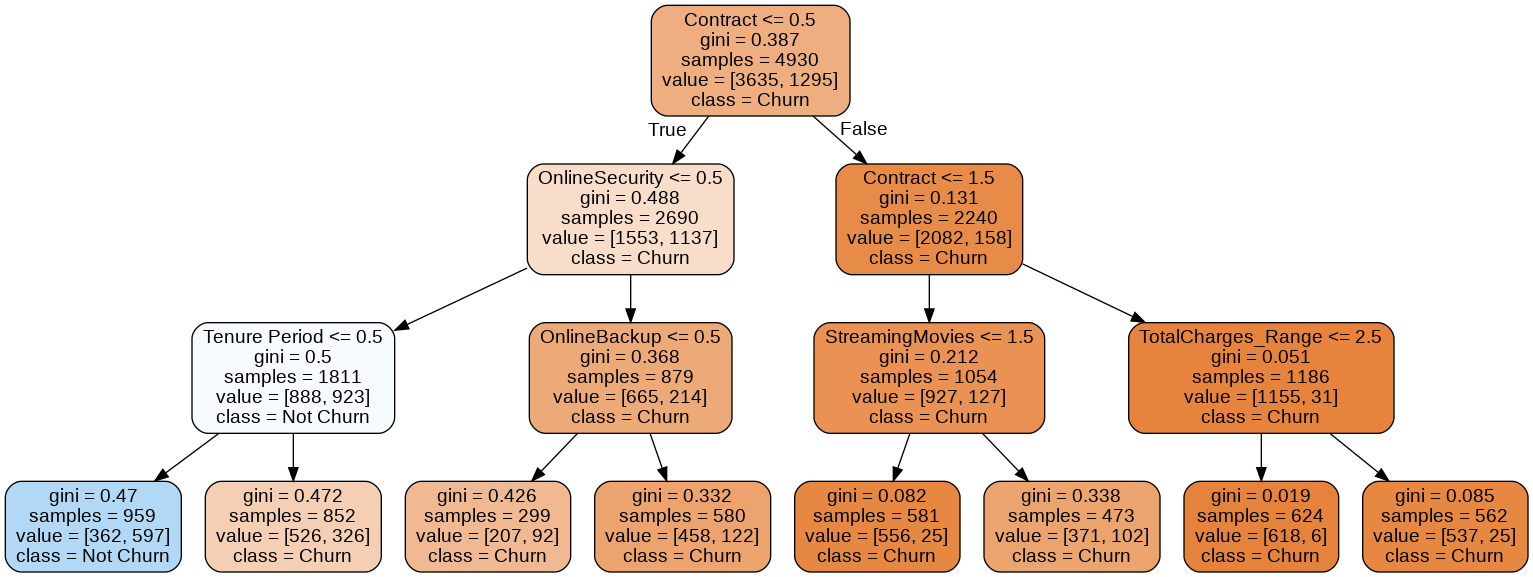

In [144]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['Churn', "Not Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [145]:
# Uncomment below line of code to save the Decision Tree Viz to a pdf file.
#graph.write_pdf("dt_heartdisease.pdf")

## 5. Model Evaluation

In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [147]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [148]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7849898580121704


array([[3273,  362],
       [ 698,  597]])

In [149]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7685754850922859


array([[1376,  163],
       [ 326,  248]])

In [150]:
# Let's check the overall accuracy.
trainaccuracy= accuracy_score(y_train, y_train_pred)
testaccuracy= accuracy_score(y_test, y_test_pred)

confusion_TRN = confusion_matrix(y_train, y_train_pred)
confusion_TST = confusion_matrix(y_test, y_test_pred)

In [151]:
TP = confusion_TRN[1,1] # true positive 
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive 
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP_TST / float(TP_TST+FN_TST)
testspecificity= TN_TST / float(TN_TST+FP_TST)

# Let us compare the values obtained for Train & Test:
print('-'*30)
print('On Train Data')
print('-'*30)
print("Accuracy    : {} %".format(round((trainaccuracy*100),2)))
print("Sensitivity : {} %".format(round((trainsensitivity*100),2)))
print("Specificity : {} %".format(round((trainspecificity*100),2)))
print('-'*30)
print('On Test Data')
print('-'*30)
print("Accuracy    : {} %".format(round((testaccuracy*100),2)))
print("Sensitivity : {} %".format(round((testsensitivity*100),2)))
print("Specificity : {} %".format(round((testspecificity*100),2)))
print('-'*30)

------------------------------
On Train Data
------------------------------
Accuracy    : 78.5 %
Sensitivity : 46.1 %
Specificity : 90.04 %
------------------------------
On Test Data
------------------------------
Accuracy    : 76.86 %
Sensitivity : 43.21 %
Specificity : 89.41 %
------------------------------


Decision Trees are simple and intutive models, However the are high variance models i.e the slight change in train data may result in poor performance on the test as they try to overfit.

Altough our model has stable results on `Train` and `Test data`, this model has low `Sensitivity` and high `Specificity`, to  further improve the performance we need to do Hyperparameter tuning.

## Thank You!